# 1. Data transformation and exploratory data analysis (EDA)
## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [2]:
# Importér nødvendige pakker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


First, we need to examine the dataset for missing values ​​and duplicates, and decide how we choose to handle them.

In [4]:
# se en oversigt over datasættet
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# tjek om der mangler værdier
adult_data.isnull().sum()


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [6]:
# se om der er dubletter
adult_data.duplicated().sum()

29

In the Adult dataset, we can see that there are both missing values ​​and duplicates.

Since the dataset is very large and the proportion of rows with missing data and duplicates is very small, I believe it is best to remove them entirely rather than trying to fill in the missing values.

This ensures that we are working with clean data without changing the data structure too much.


In [7]:
# Fjerner rækker med manglende værdier
adult_data = adult_data.dropna()

# Fjern dubletter
adult_data = adult_data.drop_duplicates()

 We work with a dataset that contains information about people, such as their age, education, and how many hours they work per week.
We will examine what factors influence whether a person earns more or less than $50,000 per year.

In [8]:
# Se datasættets struktur
adult_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   workclass       47592 non-null  object
 2   fnlwgt          47592 non-null  int64 
 3   education       47592 non-null  object
 4   education-num   47592 non-null  int64 
 5   marital-status  47592 non-null  object
 6   occupation      47592 non-null  object
 7   relationship    47592 non-null  object
 8   race            47592 non-null  object
 9   sex             47592 non-null  object
 10  capital-gain    47592 non-null  int64 
 11  capital-loss    47592 non-null  int64 
 12  hours-per-week  47592 non-null  int64 
 13  native-country  47592 non-null  object
 14  income          47592 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [9]:
adult_data.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47592.000000,4.759200e+04,47592.000000,47592.00000,47592.000000,47592.000000
mean,38.644541,1.897310e+05,10.091444,1091.80253,87.907022,40.602895
std,13.557307,1.055717e+05,2.567580,7489.46073,404.127864,12.259716
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.175848e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,4356.000000,99.000000


In [10]:
# Se de første unikke værdier for hver kategorisk variabel
categorical_cols = adult_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {adult_data[col].unique()[:5]}")  # Vis de første 5 unikke værdier


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?']
income: ['<=50K' '>50K' '<=50K.' '>50K.']


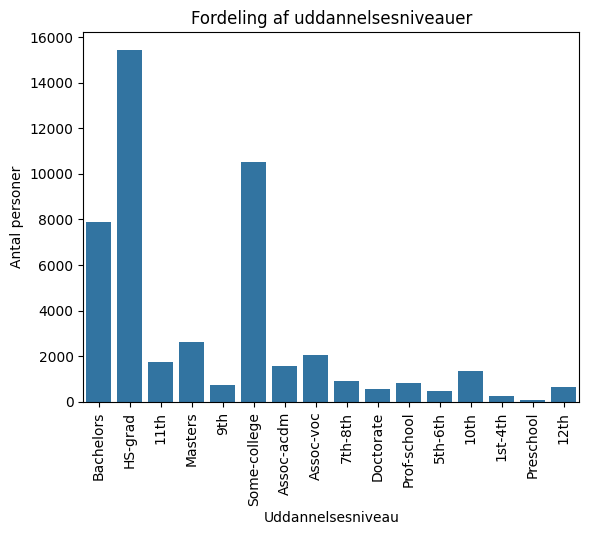

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot over uddannelsesniveau
sns.countplot(x="education", data=adult_data)
plt.xticks(rotation=90)  # Drej teksten for bedre læsbarhed
plt.title("Fordeling af uddannelsesniveauer")
plt.xlabel("Uddannelsesniveau")
plt.ylabel("Antal personer")
plt.show()


 De fleste personer i datasættet har en highschool grad eller en bachelorgrad. 

få personer har lavere uddannelse (som grundskole) eller højere uddannelser (som ph.d.)

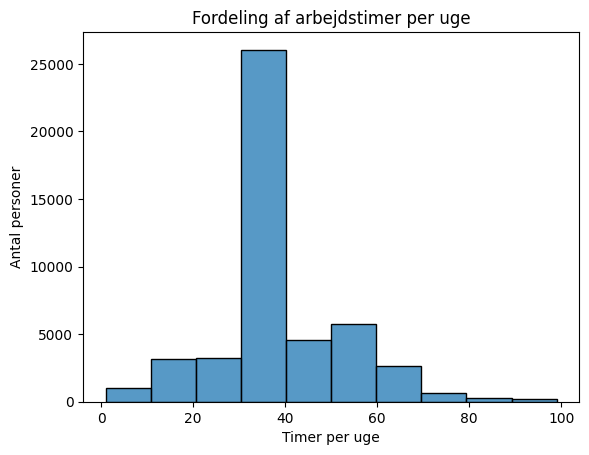

In [12]:
# Histogram over arbejdstimer per uge
sns.histplot(adult_data["hours-per-week"], bins=10)
plt.title("Fordeling af arbejdstimer per uge")
plt.xlabel("Timer per uge")
plt.ylabel("Antal personer")
plt.show()



Langt de fleste arbejder omkring 40 timer pr uge, hvilket er en standard arbejdsuge, men der er stædige enkelte afvigelser, for både flere og færre timer om ugen. 

In [13]:
# Fjern mellemrum og punktummer fra income-kolonnen
adult_data["income"] = adult_data["income"].str.strip().replace({'.':''})


In [14]:
# fjerner alle tegn, der ikke er bogstaver, tal, <, > (så vi beholder <=50K og >50K).
adult_data["income"] = adult_data["income"].str.strip().str.replace(r"[^\w<>]", "", regex=True)


In [15]:
print(adult_data["income"].unique())


['<50K' '>50K']


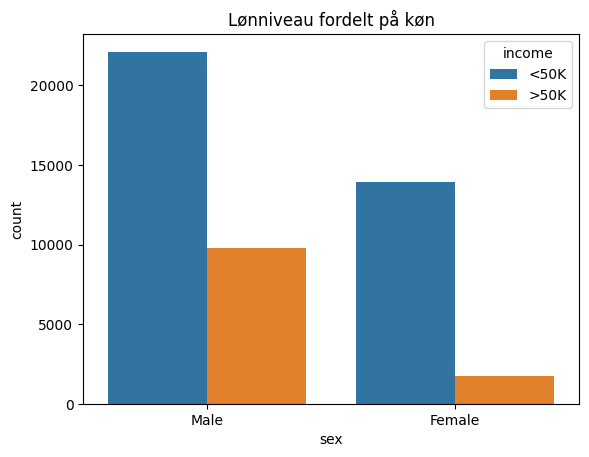

In [16]:
sns.countplot(x="sex", hue="income", data=adult_data)
plt.title("Lønniveau fordelt på køn")
plt.show()

There are significantly more men earning over 50K, while far fewer women reach this salary level.

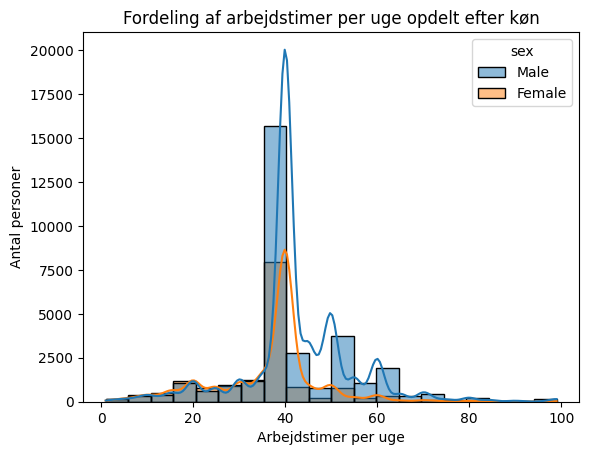

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="hours-per-week", hue="sex", bins=20, kde=True, data=adult_data)
plt.title("Fordeling af arbejdstimer per uge opdelt efter køn")
plt.xlabel("Arbejdstimer per uge")
plt.ylabel("Antal personer")
plt.show()


the distribution shows that men on average work slightly more hours per week than women.
however, it is most common for both parties to work 40 hours per week

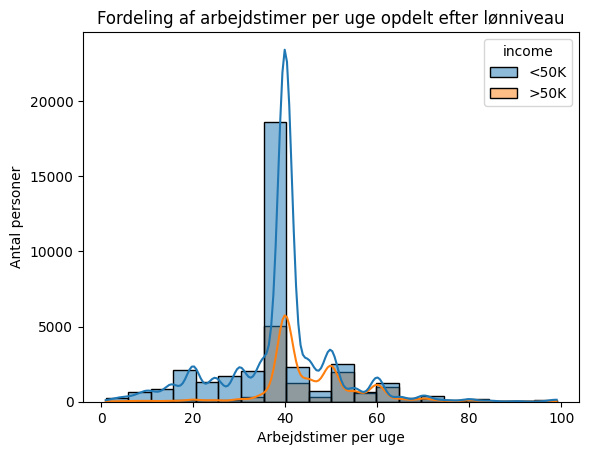

In [20]:

sns.histplot( x="hours-per-week", hue="income", bins=20, kde=True,data=adult_data)
plt.title("Fordeling af arbejdstimer per uge opdelt efter lønniveau")
plt.xlabel("Arbejdstimer per uge")
plt.ylabel("Antal personer")
plt.show()


People with higher salaries generally work slightly more hours than those earning under or up to 50K.

But the hours worked are not solely related to the salary they receive.

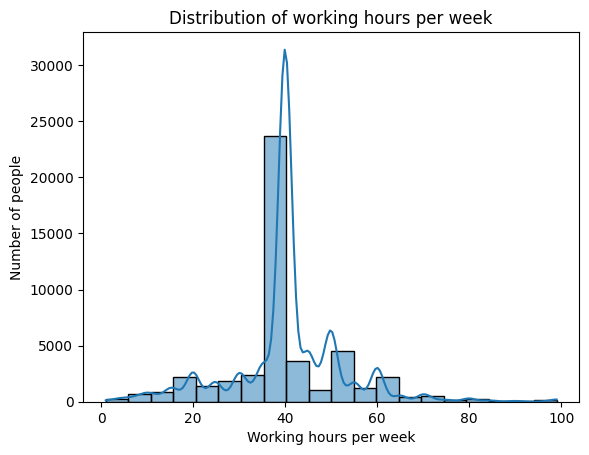

In [19]:

sns.histplot(data=adult_data, x="hours-per-week", bins=20, kde=True)
plt.title("Distribution of working hours per week")
plt.xlabel("Working hours per week")
plt.ylabel("Number of people")
plt.show()



The level of education in the dataset is typically high school or bachelor's degree, which can affect job opportunities and wages.

Working hours are relatively fast for most, but a smaller group works either very few or extremely long hours.

There is a gender gap in wage levels, with men more often earning over 50K than women.

Wage levels are not necessarily proportional to working hours, as many with low wages still work full time.